# Monty Hall Problem - Q1

In [1]:
Name1 = 'Hadas Goren'
Name2 = 'Elad Gishri'
id1 = '307916296'
id2 = '201080231'

In [2]:
import numpy as np
from numpy.random import randint

# Create randomly the door which hides the car behind it
def randomCarDoor(doors):
    carDoor = np.random.randint(doors.size)
    doors[carDoor] = 'CAR'
    return carDoor

In [3]:
# Create players random first door selection
def playersChoice(doors):
    pChoice = np.random.randint(doors.size)
    return pChoice

In [4]:
# Host reveals goat door after first guess
def revealGoat(doors, carDoor, pChoice):
    hostChoice = np.random.randint(doors.size)
    while(hostChoice == carDoor or hostChoice == pChoice):
        hostChoice = np.random.randint(doors.size)
    return hostChoice

In [5]:
# Random players final decision as per player type (A/B/C)
def finalDecision(doors, playerType, carDoor, pChoice, hostChoice):
    flagC = -1
    # Player C -> equal 0.5 probability of switching choice or sticking to original choice
    # flagC = 0 -> stick to original | flagC = 1 -> change choice
    if(playerType == 'C'):
        flagC = np.random.randint(2)
    # Player A -> Always sticks to original decision
    if(playerType == 'A' or flagC == 0):
        finChoice = pChoice;
    # Player B -> Always switches choice to the closed door
    if(playerType == 'B' or flagC == 1):
        finChoice = np.random.randint(doors.size)
        while(finChoice==pChoice or finChoice==hostChoice):
            finChoice = np.random.randint(doors.size)
    return finChoice
    

In [6]:
def checkWin(carDoor, finChoice):
    if (carDoor == finChoice):
        isWin = 1
    else:
        isWin = 0
    return isWin

In [7]:
def mainForWinRate(playerType):
    doors = np.array(['GOAT', 'GOAT', 'GOAT'])
    results = np.zeros(1000)
    wins = np.zeros(1000)
    counter=0
    
    for i in range(1000):
        # Generate random index for winning door
        carDoor = randomCarDoor(doors)
        # Generate random 1st choice of player
        pChoice = playersChoice(doors)
        # Host reveals 1 door that has a goat behind it - not the door chosen by player
        hostChoice = revealGoat(doors, carDoor, pChoice)
        # Generate final decision based on player type
        finChoice = finalDecision(doors, playerType, carDoor, pChoice, hostChoice)
        # Check if player won the car
        isWin = checkWin(carDoor,finChoice)
        counter += isWin;
        wins[i] = counter
        results[i] = counter/(i+1)
        doors = np.array(['GOAT', 'GOAT', 'GOAT'])
    return results

In [8]:
import matplotlib.pyplot as plt
# Create graph for each player type's winning rate for 1000 games
def plotWinRate(results, playerType):
    plt.figure(figsize=(14,5))
    plt.plot(results,'-')
    plt.ylim([0,1])
    plt.xlabel('Games Played')
    plt.ylabel('Win Percentage')
    plt.title('Winning rate for player ' + playerType)
    return

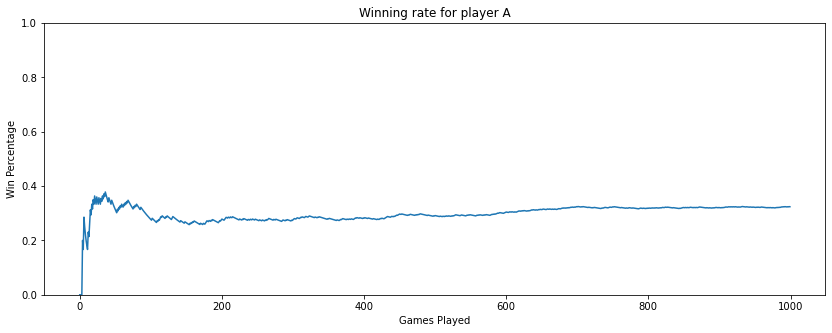

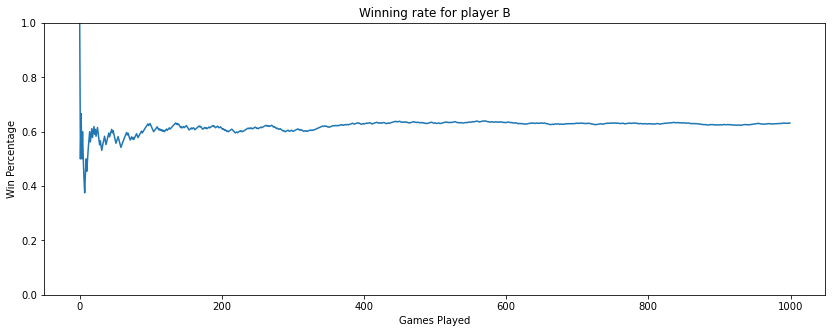

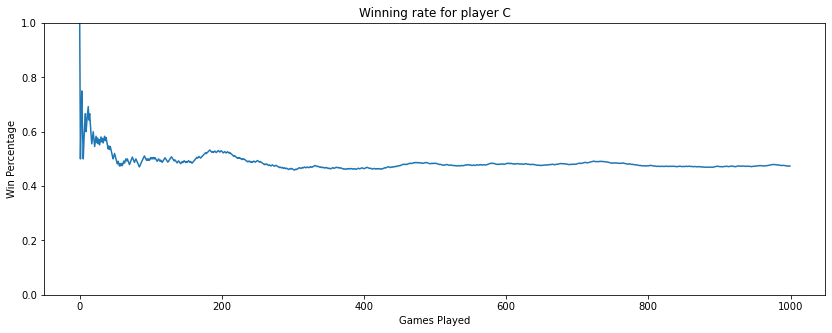

In [9]:
# For Player A
results = mainForWinRate('A')
plotWinRate(results, 'A')

# For Player B
results = mainForWinRate('B')
plotWinRate(results, 'B')

# For Player C
results = mainForWinRate('C')
plotWinRate(results, 'C')

# Coin Flip - Q2

In [10]:
def plotCoinFlip(K, N):
    p = np.linspace(0, 1, 300)
    probability = (p**K)*((1-p)**(N-K))
    plt.figure(figsize=(14,5))
    plt.plot(p, probability,'-')
    plt.xlabel('Probability')
    plt.ylabel('P(D)')
    plt.title('Coin Flip (K=' + str(K) + ', N=' + str(N) + ')')
    
    # mark max point on graphs
    y_max = probability.argmax()
    plt.plot(0.3,probability[y_max],'-gD')
    return

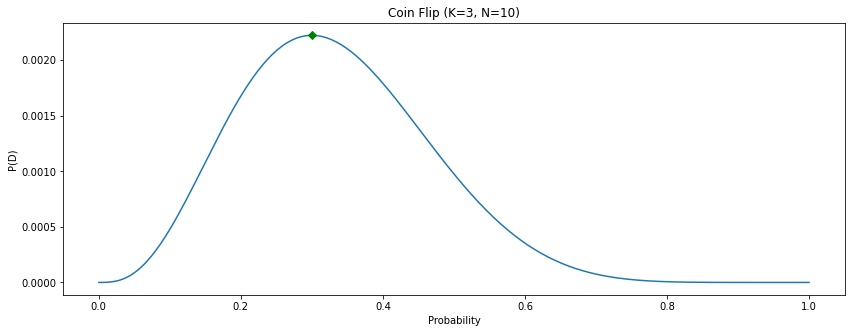

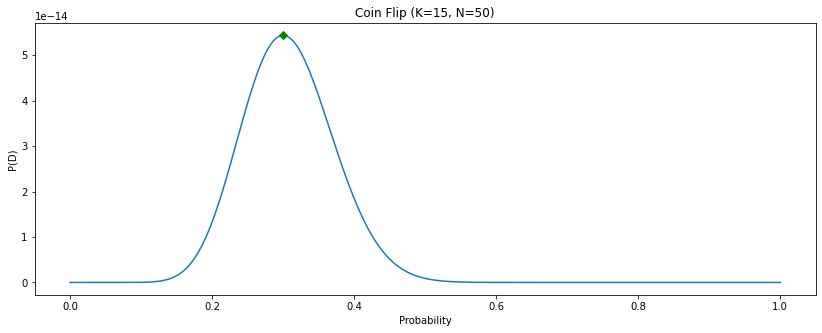

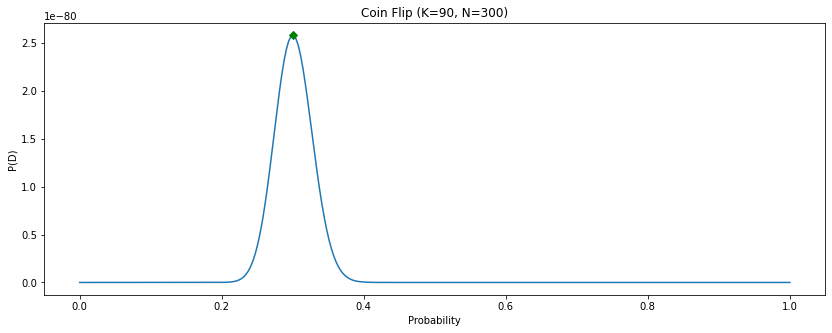

In [11]:
plotCoinFlip(3,10)
plotCoinFlip(15,50)
plotCoinFlip(90,300)